In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np


In [2]:
covid_df= pd.read_csv('US_COVID-19_Cases_and_Deaths_by_State_over_Time.csv',thousands=',', parse_dates=[0])
covid_df.drop(['consent_cases', 'consent_deaths', 'created_at', 'conf_cases','prob_cases', 'conf_death','pnew_case','prob_death', 'pnew_death'], axis= 1, inplace = True)
covid_df.rename(columns={'submission_date':'Submission Date','state':'State','tot_cases':'Total Cases','new_case':'Daily New Cases','tot_death':'Total Deaths','new_death': 'Daily New Deaths'}, inplace = True)

covid_df.sort_values(['State','Submission Date'])


,Submission Date,State,Total Cases,Daily New Cases,Total Deaths,Daily New Deaths
3599,2020-01-22,AK,0,0,0,0
28030,2020-01-23,AK,0,0,0,0
29871,2020-01-24,AK,0,0,0,0
29941,2020-01-25,AK,0,0,0,0
32257,2020-01-26,AK,0,0,0,0
...,...,...,...,...,...,...
15653,2021-08-23,WY,71562,299,809,0
27695,2021-08-24,WY,72069,507,835,26
24804,2021-08-25,WY,72528,459,835,0
27392,2021-08-26,WY,72995,467,835,0


In [4]:
covid_df_grouped_date = covid_df.groupby(['Submission Date']).sum()
covid_df_grouped_date
covid_df_grouped_date.columns = pd.MultiIndex.from_product([["COVID-19"], covid_df_grouped_date.columns])
covid_df_grouped_date.reset_index(level=0, inplace = True)

In [5]:
stock_df= yf.download("FB", group_by='Ticker', start="2020-01-22", end="2021-08-27")


stock_df.reset_index(inplace=True)
stock_df.rename(columns={"Date":"Submission Date"},inplace = True)

[*********************100%***********************]  1 of 1 completed


In [7]:
complete_df = pd.merge(covid_df_grouped_date, stock_df, on='Submission Date', how='inner')

C:\Users\thoma\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [157]:
# display merged dataframe
complete_df

,Submission Date,"(Submission Date, )","(COVID-19, Total Cases)","(COVID-19, Daily New Cases)","(COVID-19, Total Deaths)","(COVID-19, Daily New Deaths)",Open,High,Low,Close,Adj Close,Volume
0,2020-01-22,2020-01-22,33,33,0,0,222.309998,222.750000,221.279999,221.320007,221.320007,12212800
1,2020-01-23,2020-01-23,35,2,0,0,220.750000,221.490005,219.270004,219.759995,219.759995,11195000
2,2020-01-24,2020-01-24,36,1,0,0,220.800003,221.779999,216.110001,217.940002,217.940002,11905800
3,2020-01-27,2020-01-27,43,1,0,0,213.100006,216.059998,212.500000,214.869995,214.869995,13810700
4,2020-01-28,2020-01-28,44,1,0,0,216.139999,218.740005,213.520004,217.789993,217.789993,13413800
...,...,...,...,...,...,...,...,...,...,...,...,...
399,2021-08-20,2021-08-20,37671394,160857,627325,999,354.600006,359.989990,353.309998,359.369995,359.369995,8693500
400,2021-08-23,2021-08-23,38037577,112020,629220,703,359.440002,365.690002,359.100006,363.350006,363.350006,10942000
401,2021-08-24,2021-08-24,38192607,154363,630408,1184,363.660004,367.959991,361.839996,365.510010,365.510010,9235100
402,2021-08-25,2021-08-25,38360956,162485,631563,1138,365.600006,370.859985,365.399994,368.390015,368.390015,9684500


<AxesSubplot:title={'center':'Facebook'}, xlabel='Date', ylabel='Stock Price'>

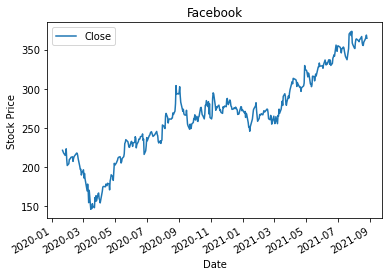

In [8]:
ax = complete_df.plot(kind = 'line', x='Submission Date', y='Close')
ax.set(xlabel="Date", ylabel="Stock Price", title="Facebook")
ax